In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()
# for theming info, see:
#  - https://seaborn.pydata.org/tutorial/aesthetics.html
#  - https://seaborn.pydata.org/tutorial/color_palettes.html

In [2]:
sales_joined = pd.read_parquet("./data/m5-forecasting-accuracy/sales-joined.parq.brotli")
sales_joined_2015 = sales_joined[(sales_joined.date >= '2015-01-01') & (sales_joined.date < '2016-01-01')]
# if your system has less RAM, the alternate download is just one year of data
# sales_joined = pd.read_parquet("./data/m5-forecasting-accuracy/sales-joined-2015.parq.brotli")

In [3]:
# fyi resource usage
mem_gb = sales_joined.memory_usage().sum() / 1024 ** 3
print(f"{len(sales_joined) / 1e6:.1f} million rows using {mem_gb:.2f} GB of RAM")

59.2 million rows using 6.17 GB of RAM


## Bar Charts

In [6]:
total_sales_by_store = sales_joined.groupby("store_id")["count"].sum().reset_index()
total_sales_by_store

,store_id,count
0,CA_1,7832248
1,CA_2,5818395
2,CA_3,11363540
3,CA_4,4182534
4,TX_1,5692823
5,TX_2,7329642
6,TX_3,6205940
7,WI_1,5261506
8,WI_2,6697988
9,WI_3,6542557


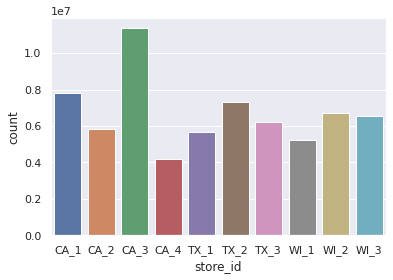

In [7]:
sns.barplot(data=total_sales_by_store, x="store_id", y="count");

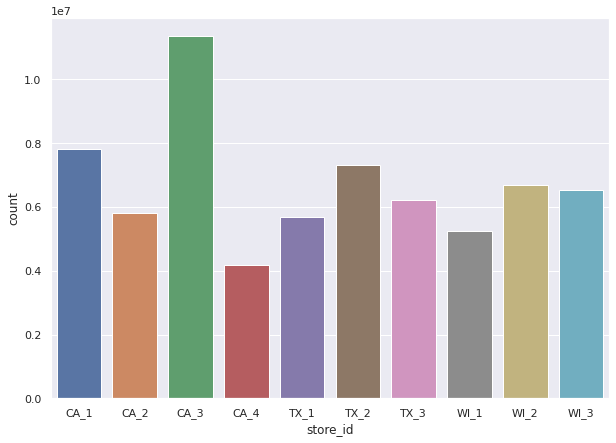

In [8]:
# changing individual figure sizes is a bit annoying in seaborn
_, ax = plt.subplots(figsize=(10, 7))
sns.barplot(
    data=total_sales_by_store, # the data
    x="store_id", # the horizontal column
    y="count", # the vertical column
    # hue="store_id", # color based on the store color
    ax=ax,
);

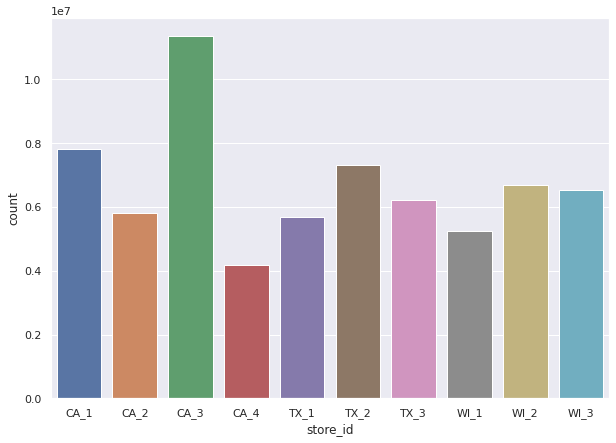

In [9]:
# but you can set the figsize globally
sns.set(rc={'figure.figsize': (10, 7)})
sns.barplot(
    data=total_sales_by_store, # the data
    x="store_id", # the horizontal column
    y="count", # the vertical column
);

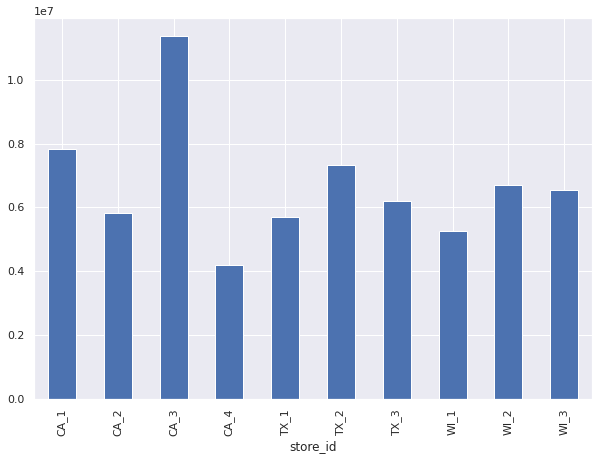

In [10]:
# Note: the seaborn theme has been applied to pandas charts too (figsize included)
total_sales_by_store.set_index("store_id")["count"].plot(kind="bar");

## Histograms

In [32]:
sales_joined.head()

,day,id,count,date,item_id,dept_id,cat_id,store_id,state_id,wm_yr_wk,sell_price,year,month
0,d_1,HOBBIES_1_001_CA_1_evaluation,0,2011-01-29,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,11101,NaN,2011,201101
1,d_1,HOBBIES_1_002_CA_1_evaluation,0,2011-01-29,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,11101,NaN,2011,201101
2,d_1,HOBBIES_1_003_CA_1_evaluation,0,2011-01-29,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,11101,NaN,2011,201101
3,d_1,HOBBIES_1_004_CA_1_evaluation,0,2011-01-29,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,11101,NaN,2011,201101
4,d_1,HOBBIES_1_005_CA_1_evaluation,0,2011-01-29,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,11101,NaN,2011,201101


<AxesSubplot:xlabel='sell_price', ylabel='Count'>

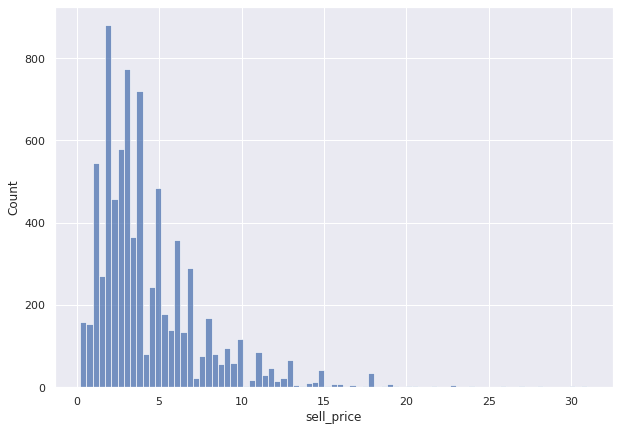

In [35]:
# you can do a standard histogram plot
sns.histplot(
    sales_joined.sample(10_000),
    x="sell_price",
)

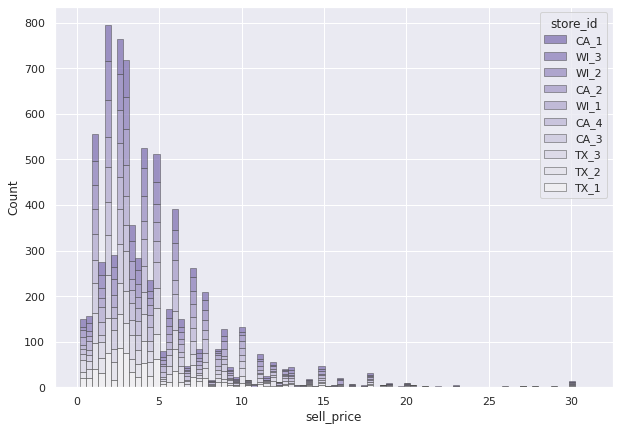

In [36]:
# ...or get much more complicated
sns.histplot(
    sales_joined.sample(10_000),
    x="sell_price",
    hue="store_id",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
);

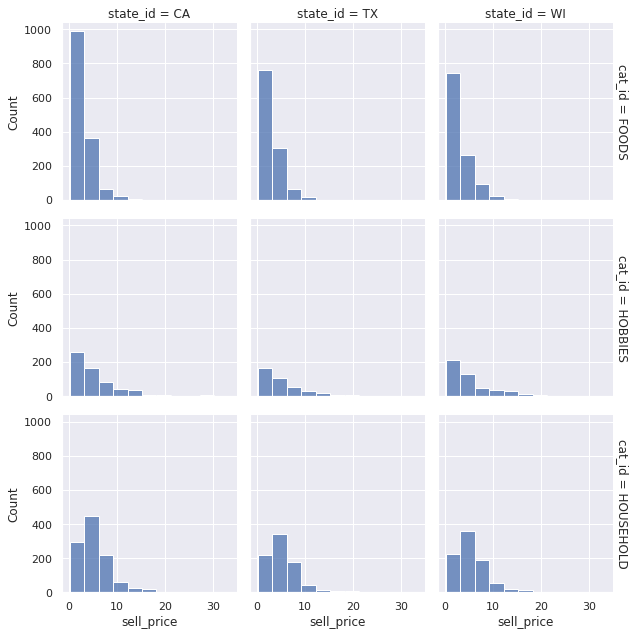

In [37]:
# you can also use distplot for a similar effect
sns.displot(
    sales_joined.sample(10_000),
    x="sell_price",
    col="state_id",
    row="cat_id",
    binwidth=3,
    height=3,
    facet_kws=dict(margin_titles=True),
)

In [39]:
sales_joined

,day,id,count,date,item_id,dept_id,cat_id,store_id,state_id,wm_yr_wk,sell_price,year,month
0,d_1,HOBBIES_1_001_CA_1_evaluation,0,2011-01-29,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,11101,NaN,2011,201101
1,d_1,HOBBIES_1_002_CA_1_evaluation,0,2011-01-29,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,11101,NaN,2011,201101
2,d_1,HOBBIES_1_003_CA_1_evaluation,0,2011-01-29,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,11101,NaN,2011,201101
3,d_1,HOBBIES_1_004_CA_1_evaluation,0,2011-01-29,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,11101,NaN,2011,201101
4,d_1,HOBBIES_1_005_CA_1_evaluation,0,2011-01-29,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,11101,NaN,2011,201101
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59181085,d_1941,FOODS_3_823_WI_3_evaluation,1,2016-05-22,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,11617,2.98,2016,201605
59181086,d_1941,FOODS_3_824_WI_3_evaluation,0,2016-05-22,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,11617,2.48,2016,201605
59181087,d_1941,FOODS_3_825_WI_3_evaluation,2,2016-05-22,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,11617,3.98,2016,201605
59181088,d_1941,FOODS_3_826_WI_3_evaluation,0,2016-05-22,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,11617,1.28,2016,201605


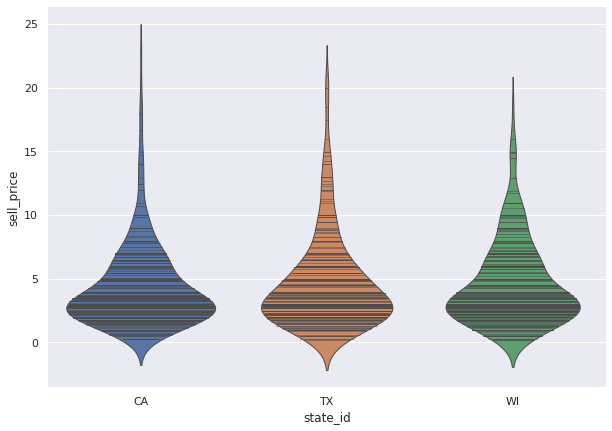

In [57]:
# or violinplot...
sample_df = sales_joined[(sales_joined.date >= '2015-01-01') & (sales_joined.date < '2016-01-01')].dropna(subset=["sell_price"]).sample(1_000)
sns.violinplot(
    x=sample_df["state_id"],
    y=sample_df["sell_price"],
    linewidth=1,
    inner="stick",
)
sns.despine(left=True)

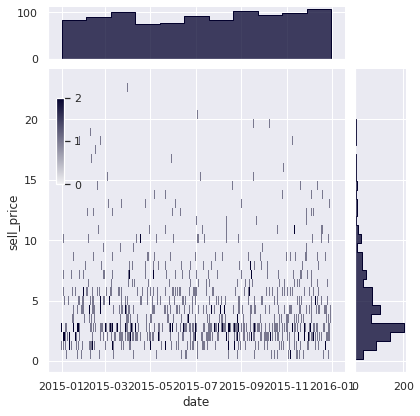

In [ ]:
# or joint histograms...
g = sns.JointGrid(data=sales_joined_2015, x="date", y="sell_price", marginal_ticks=True)
cax = g.figure.add_axes([.15, .55, .02, .2])
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax,
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")

...and there are still more histogram-like plots. Check them out in the [Seaborn Example Gallery](https://seaborn.pydata.org/examples/index.html).

## Scatterplots

In [4]:
sales_by_store_by_month = sales_joined.groupby(["store_id", "month"])["count"].sum().reset_index()
sales_by_store_by_month["month_date"] = pd.to_datetime(sales_by_store_by_month["month"].astype(str), format="%Y%m")
sales_by_store_by_month.drop(columns=["month"], inplace=True)
sales_by_store_by_month["month_prev"] = sales_by_store_by_month["month_date"] - pd.DateOffset(months=1)
sales_by_store_by_month = pd.merge(
    sales_by_store_by_month, sales_by_store_by_month,
    left_on=["store_id", "month_prev"], right_on=["store_id", "month_date"], suffixes=('', '_prev'),
)

,store_id,count,month_date,month_prev,count_prev,month_date_prev,month_prev_prev
0,CA_1,89434,2011-02-01,2011-01-01,11308,2011-01-01,2010-12-01
1,CA_1,93468,2011-03-01,2011-02-01,89434,2011-02-01,2011-01-01
2,CA_1,91553,2011-04-01,2011-03-01,93468,2011-03-01,2011-02-01
3,CA_1,87988,2011-05-01,2011-04-01,91553,2011-04-01,2011-03-01
4,CA_1,90376,2011-06-01,2011-05-01,87988,2011-05-01,2011-04-01


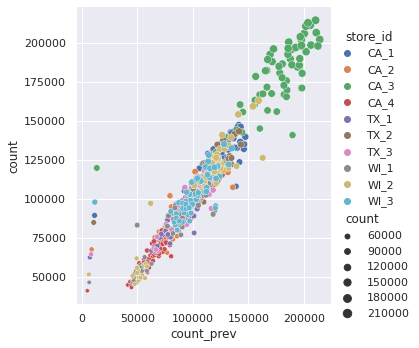

In [27]:
sns.relplot(
    data=sales_by_store_by_month,
    x="count_prev",
    y="count",
    hue="store_id",
    size="count",
)
sales_by_store_by_month.head()

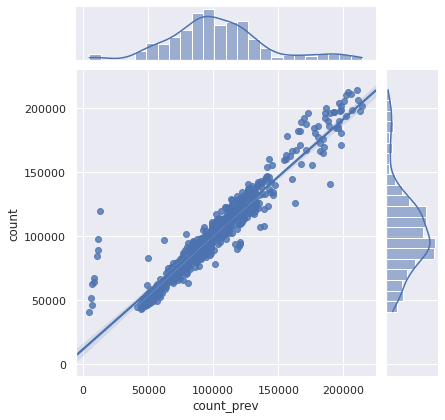

In [23]:
# with an automatic regression applied and plotted...
sns.jointplot(
    data=sales_by_store_by_month,
    x="count_prev",
    y="count",
    kind="reg",
    truncate=False,
);


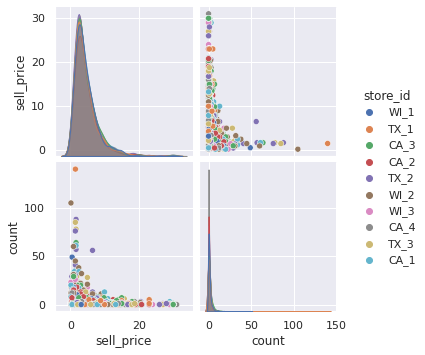

In [26]:
# multiple scatterplots for all variables (not great for this dataset)
sns.pairplot(
    sales_joined_2015.sample(10_000)[["sell_price", "count", "store_id"]],
    hue="store_id",
)

## Timeseries Plot

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
month_date,,,,,,,,,,
2011-02-01,89434,67686,119792,41189,62534,84900,64581,46592,51708,97959
2011-03-01,93468,73964,127344,44902,66890,89902,68370,49747,51113,97867
2011-04-01,91553,72803,122428,44220,66435,87683,66563,46898,47651,91479
2011-05-01,87988,68305,120711,44562,67920,86128,67572,45269,45487,85620
2011-06-01,90376,69380,129867,43325,69945,89914,75794,46776,50737,87266


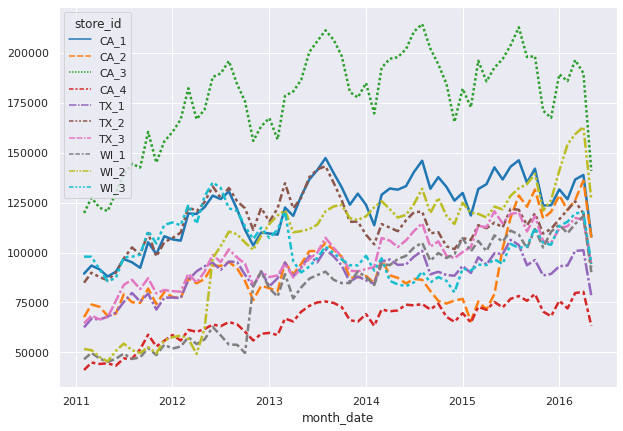

In [11]:
monthly_sales = sales_by_store_by_month.pivot(index="month_date", columns="store_id", values="count")
sns.lineplot(data=monthly_sales, palette="tab10", linewidth=2.5)
monthly_sales.head()

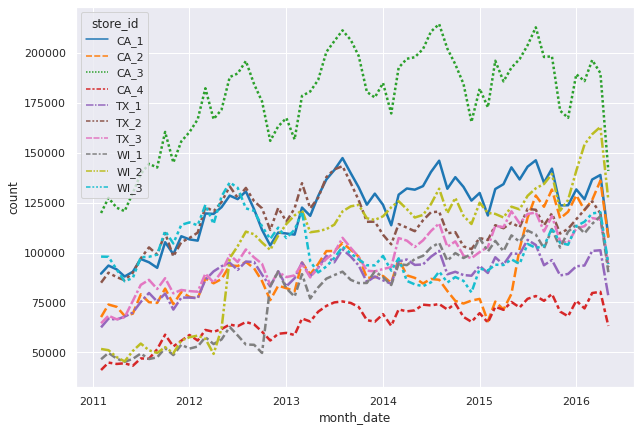

In [17]:
# note that seaborn can do the pivot for you
sns.lineplot(data=sales_by_store_by_month, x="month_date", y="count", palette="tab10", linewidth=2.5, hue="store_id", style="store_id");

## See also:
 - [Seaborn Example Gallery](https://seaborn.pydata.org/examples/index.html)
 - [This notebook on Seaborn Visualization](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks_v1/04.14-Visualization-With-Seaborn.ipynb)
